   **FRAUD DETECTION IN FINANCIAL TRANSACTION USING LSTM**

Within this python notebook , we are going to do the Fraud Detection in Financial Transaction, using the dataset from kaggle :
https://www.kaggle.com/datasets/sriharshaeedalafinancial-fraud-detection-dataset


In this notebook we are going to do

1. Importing the Dataset
2. Differentiating Labels and Features
3. Label Encoding
4. LSTM model architecture
5. model compilation and traininig
6. metrics visualization

**Problem Statement**:
With the rise of digital financial services, the risk of fraudulent transactions has increased significantly. **Detecting** fraudulent activities promptly can save financial institutions and customers from substantial **financial losses**. This problem statement focuses on **developing a machine learning model** to detect **fraudulent transactions** using a given dataset of financial transactions.

**ABOUT DATASET:**


**step**: Represents a unit of time in the real world, with 1 step equating to 1 hour. The total simulation spans 744 steps, equivalent to 30 days.

**type**: Transaction types include CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER.

**amount**: The transaction amount in the local currency.

**nameOrig**: The customer initiating the transaction.

**oldbalanceOrg**: The initial balance before the transaction.

**newbalanceOrig**: The new balance after the transaction.

**nameDest**: The transaction's recipient customer.

**oldbalanceDest**: The initial recipient's balance before the transaction. Not applicable for customers identified by 'M' (Merchants).

**newbalanceDest**: The new recipient's balance after the transaction. Not applicable for 'M' (Merchants).

**isFraud**: Identifies transactions conducted by fraudulent agents aiming to deplete customer accounts through transfers and cash-outs.

**isFlaggedFraud**: Flags large-scale, unauthorized transfers between accounts, with any single transaction exceeding 200,000 being considered illegal.

Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Importing Dataset

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/Dataset/Fraud_Detection/Fraud.csv")
print(df.keys())

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


The dataset contains **67 Million rows**. As this is computationally ineffective , we need to drop some of the rows with target value as 0 so that , it does not affect the model

In [ ]:
condition = df['isFraud'] == 0
percentage_to_drop = 0.9
filtered_df = df[condition]
num_rows_to_drop = int(len(filtered_df) * percentage_to_drop)
rows_to_drop = filtered_df.sample(n=num_rows_to_drop, random_state=42).index
df_dropped = df.drop(rows_to_drop)

print("Original DataFrame:\n", len(df))
print("\nFiltered and Dropped DataFrame:\n", len(df_dropped))

Original DataFrame:
 6362620

Filtered and Dropped DataFrame:
 643654


In [ ]:
fraud = df_dropped[df_dropped["isFraud"] == 1]
flagged = fraud[fraud["isFlaggedFraud"] == 1]
print("The total number of Rows Targetting to Fraud are :- ",len(fraud))
print("And from that rows the amount of transaction exceeding 200k are :- ",len(flagged))

The total number of Rows Targetting to Fraud are :-  8213
And from that rows the amount of transaction exceeding 200k are :-  16


Data Preprocessing and removal of unnecessary columns

In [ ]:
df_dropped.drop(['nameOrig','nameDest',"isFlaggedFraud"], axis=1, inplace=True)

In [ ]:
LE = LabelEncoder()
df_dropped['type'] = LE.fit_transform(df_dropped['type'])
print(df_dropped['type'].unique())

[4 1 3 2 0]


Converting the dataframe into **Features** and **Labels**

In [ ]:
X = df_dropped.iloc[:,:-1]
y = df_dropped.iloc[:,-1]

Model Architecture

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(X), output_dim=32, input_length=7))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 7, 32)             20596928  
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 20621825 (78.67 MB)
Trainable params: 20621825 (78.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model Compile and Loss Function Declaration

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Splitting the dataset to training and testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

Training the model

In [ ]:
history = model.fit(x_train, y_train,batch_size = 100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
5150/5150 [==============================] - 70s 13ms/step - loss: 0.0238 - accuracy: 0.9944 - val_loss: 0.0105 - val_accuracy: 0.9972
Epoch 2/10
5150/5150 [==============================] - 52s 10ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0198 - val_accuracy: 0.9922
Epoch 3/10
5150/5150 [==============================] - 51s 10ms/step - loss: 5.7109e-04 - accuracy: 0.9999 - val_loss: 0.0411 - val_accuracy: 0.9862
Epoch 4/10
5150/5150 [==============================] - 54s 10ms/step - loss: 3.0413e-04 - accuracy: 0.9999 - val_loss: 0.0636 - val_accuracy: 0.9851
Epoch 5/10
5150/5150 [==============================] - 51s 10ms/step - loss: 2.3928e-04 - accuracy: 0.9999 - val_loss: 0.0850 - val_accuracy: 0.9766
Epoch 6/10
5150/5150 [==============================] - 54s 11ms/step - loss: 2.2997e-04 - accuracy: 1.0000 - val_loss: 0.1564 - val_accuracy: 0.9640
Epoch 7/10
5150/5150 [==============================] - 54s 10ms/step - loss: 1.1666e-04 - accuracy: 1.0000 

**Accuracy** and **Validation Accuracy** Graph

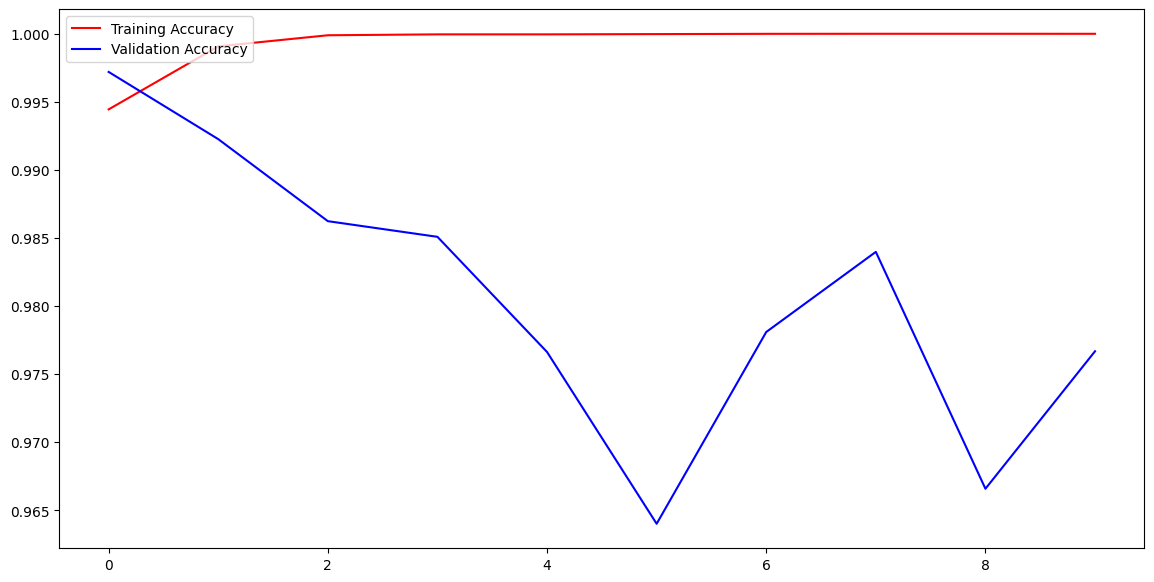

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

Training and Validation Loss over Epochs

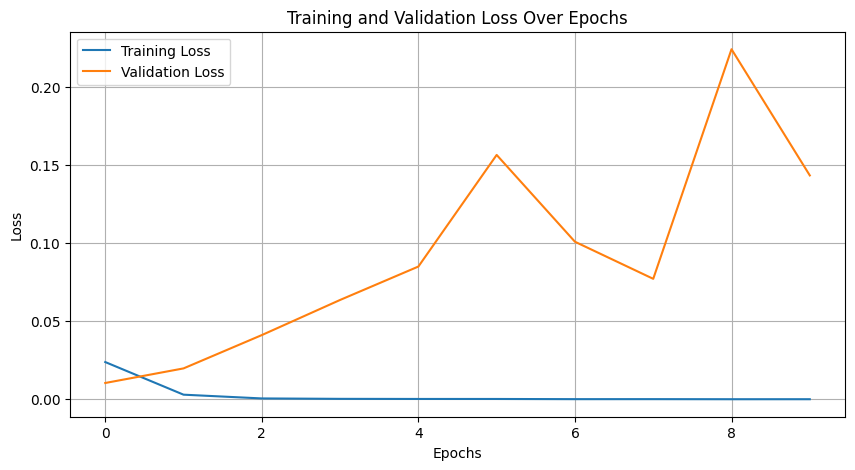

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()